In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import json
from sklearn.preprocessing import OneHotEncoder


from helpers import *

In [2]:
#171821, #872b95, #ff7131, #fe3d67

In [3]:
url = 'https://challenge-data-science-3ed.s3.amazonaws.com/Telco-Customer-Churn.json'

df = pd.json_normalize(api_request(url))
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
# Flattening each dictionary in the list
response = api_request(url)
flattened_data = [flatten(d) for d in response]

# Convert to pandas DataFrame
df = pd.DataFrame(flattened_data)
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [5]:
df.columns

Index(['customerID', 'Churn', 'customer_gender', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents', 'customer_tenure',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod',
       'account_Charges_Monthly', 'account_Charges_Total'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

In [7]:
df.isna().sum() + df.isnull().sum()

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_SeniorCitizen,7267.0,0.162653,0.369074,0.00,0.000,0.0,0.000,1.00
customer_tenure,7267.0,32.346498,24.571773,0.00,9.000,29.0,55.000,72.00
account_Charges_Monthly,7267.0,64.720098,30.129572,18.25,35.425,70.3,89.875,118.75


In [9]:
for col in df.columns:
    print(f'{col} : {df[col].unique()}')

customerID : ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn : ['No' 'Yes' '']
customer_gender : ['Female' 'Male']
customer_SeniorCitizen : [0 1]
customer_Partner : ['Yes' 'No']
customer_Dependents : ['Yes' 'No']
customer_tenure : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
phone_PhoneService : ['Yes' 'No']
phone_MultipleLines : ['No' 'Yes' 'No phone service']
internet_InternetService : ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity : ['No' 'Yes' 'No internet service']
internet_OnlineBackup : ['Yes' 'No' 'No internet service']
internet_DeviceProtection : ['No' 'Yes' 'No internet service']
internet_TechSupport : ['Yes' 'No' 'No internet service']
internet_StreamingTV : ['Yes' 'No' 'No internet service']
internet_StreamingMovies : ['No' 'Yes' 'No internet service']

In [10]:
#  Percentage of rows without information of Churn
df.Churn.value_counts() / df.Churn.value_counts().sum()

No     0.711986
Yes    0.257190
       0.030824
Name: Churn, dtype: float64

In [11]:
df = df.loc[df['Churn'] !=  ""].reset_index(drop=True)
df.Churn.value_counts() / df.Churn.value_counts().sum()

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

In [12]:
dummy_columns = [
       'Churn', 'customer_SeniorCitizen',
       'customer_Partner', 'customer_Dependents',
       'phone_PhoneService', 'phone_MultipleLines',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 
       'account_Contract', 'account_PaperlessBilling', 
       'account_PaymentMethod'
       ]

In [13]:
dummy_dict = {
                'Yes': 1,
                'No': 0, 
                'No phone service': 0, 
                'No internet service': 0}

In [14]:
df[dummy_columns] = df[dummy_columns].replace(dummy_dict)
df

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.60,593.3
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.4
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,0,1,0,0,One year,0,Mailed check,55.15,742.9
7039,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.7
7040,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,1,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75
7041,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,0,1,1,0,1,Two year,0,Mailed check,67.85,4627.65


In [15]:
for col in df.columns:
    print(f'{col} : {df[col].unique()}')

customerID : ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
Churn : [0 1]
customer_gender : ['Female' 'Male']
customer_SeniorCitizen : [0 1]
customer_Partner : [1 0]
customer_Dependents : [1 0]
customer_tenure : [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 37 49 66 67
 20 43 59 12 27  2 25 29 14 35 64 39 40 11  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 31 36 17 18 51 38 42
  0]
phone_PhoneService : [1 0]
phone_MultipleLines : [0 1]
internet_InternetService : ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity : [0 1]
internet_OnlineBackup : [1 0]
internet_DeviceProtection : [0 1]
internet_TechSupport : [1 0]
internet_StreamingTV : [1 0]
internet_StreamingMovies : [0 1]
account_Contract : ['One year' 'Month-to-month' 'Two year']
account_PaperlessBilling : [1 0]
account_PaymentMethod : ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
account_Charges_Monthl

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   int64  
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   int64  
 5   customer_Dependents        7043 non-null   int64  
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   int64  
 8   phone_MultipleLines        7043 non-null   int64  
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   int64  
 11  internet_OnlineBackup      7043 non-null   int64  
 12  internet_DeviceProtection  7043 non-null   int64  
 13  internet_TechSupport       7043 non-null   int64

In [17]:
column_types = {
    'account_Charges_Total': 'float64'  # changed this to float64
}

In [18]:
missing_values = df[df['account_Charges_Total'] == ' '].shape

print(f'There are {missing_values[0]} missing values in column account_Charges_Total')

df = df[df['account_Charges_Total'] != ' '] # Excluding the null values from the column

There are 11 missing values in column account_Charges_Total


In [19]:
df = df.astype(column_types) # Setting the data tpye using the dictionary
df.dtypes

customerID                    object
Churn                          int64
customer_gender               object
customer_SeniorCitizen         int64
customer_Partner               int64
customer_Dependents            int64
customer_tenure                int64
phone_PhoneService             int64
phone_MultipleLines            int64
internet_InternetService      object
internet_OnlineSecurity        int64
internet_OnlineBackup          int64
internet_DeviceProtection      int64
internet_TechSupport           int64
internet_StreamingTV           int64
internet_StreamingMovies       int64
account_Contract              object
account_PaperlessBilling       int64
account_PaymentMethod         object
account_Charges_Monthly      float64
account_Charges_Total        float64
dtype: object

In [20]:
one_hot_enconding_columns = ['customer_gender', 'internet_InternetService', 'account_Contract', 'account_PaymentMethod']

df_encoded = encoder(df, one_hot_enconding_columns) # Utilizing the function encoder defined in the helper.py to encode the columns in the list
df_encoded.head()

,customerID,Churn,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_OnlineSecurity,internet_OnlineBackup,...,account_Charges_Monthly,account_Charges_Total,customer_gender_Male,internet_InternetService_Fiber optic,internet_InternetService_No,account_Contract_One year,account_Contract_Two year,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0002-ORFBO,0.0,0.0,1.0,1.0,9.0,1.0,0.0,0.0,1.0,...,65.6,593.30,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0003-MKNFE,0.0,0.0,0.0,0.0,9.0,1.0,1.0,0.0,0.0,...,59.9,542.40,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0004-TLHLJ,1.0,0.0,0.0,0.0,4.0,1.0,0.0,0.0,0.0,...,73.9,280.85,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0011-IGKFF,1.0,1.0,1.0,0.0,13.0,1.0,0.0,0.0,1.0,...,98.0,1237.85,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0013-EXCHZ,1.0,1.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,...,83.9,267.40,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## **Exploratory Data Analysis (EDA)**

Now that we have succesfully encoded and cleaned our data, is time to peform some EDA. Here we aim to understand the correlations of our data and find patterns that might be helpfull in the model building phase.

In [23]:
color_palette = ['#171821', '#872b95', '#ff7131', '#fe3d67']
binary_palette = ['#171821', '#fe3d67']

### Analyzing the Distribution of Variables

#### Targer Variable

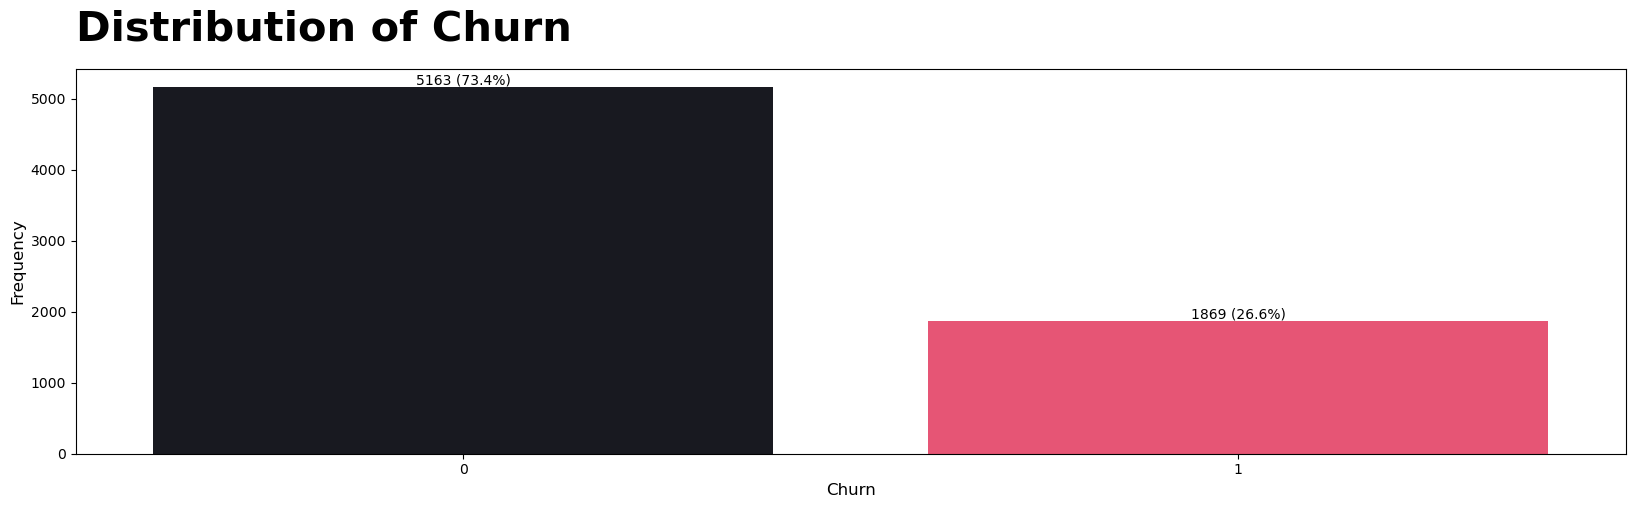

In [24]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x='Churn', data=df, palette=binary_palette)
ax.set_title('Distribution of Churn', size=30, loc='left', fontweight='bold', pad=20)
ax.set_xlabel('Churn', size=12)
ax.set_ylabel('Frequency', size=12)

label_bars(ax) # function to label the data


plt.show()

We'll probably need to address this undersampling of churn values during the model building phase. One option is to use over sampling techniques.

#### Categorical Variables

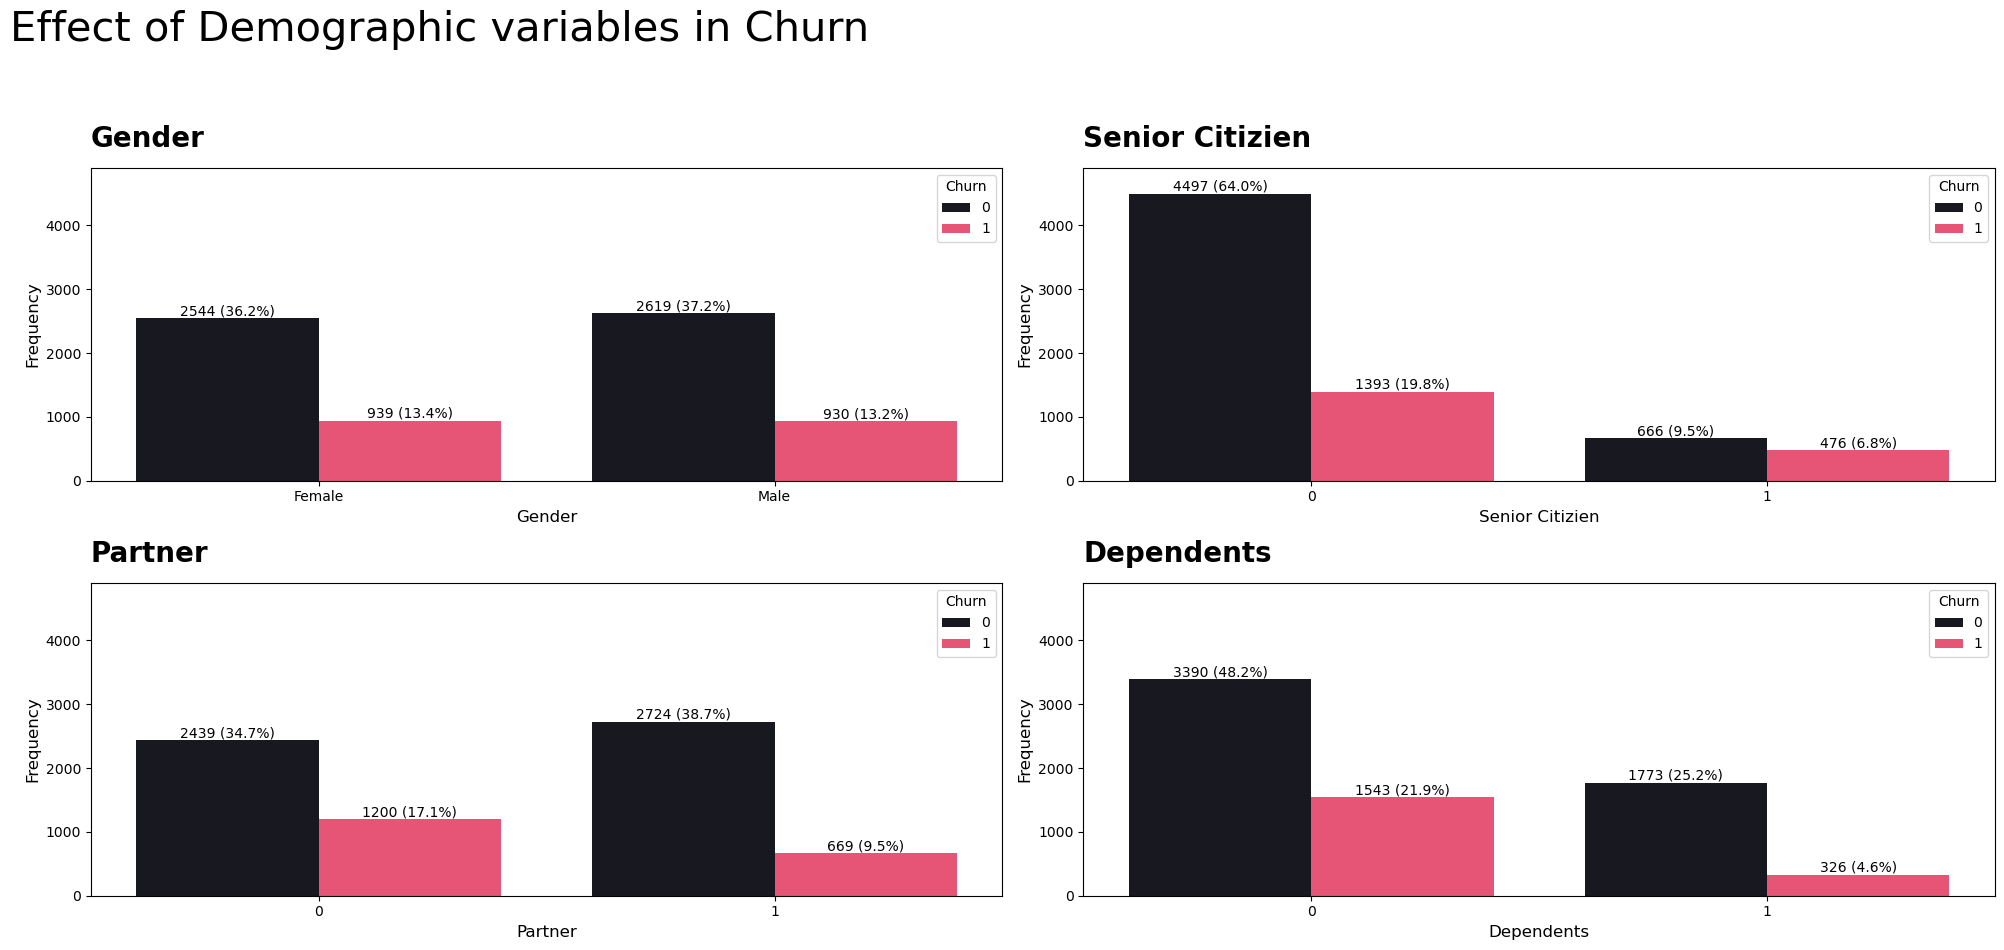

In [25]:
demographic_columns = [('customer_gender', 'Gender'), ('customer_SeniorCitizen', 'Senior Citizien'), ('customer_Partner', 'Partner'), ('customer_Dependents', 'Dependents')]

plt.figure(figsize=(20,9))
plt.suptitle('Effect of Demographic variables in Churn', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

distribution_plot('Churn', demographic_columns, df) # Function to plot countplot with the target varible as hue

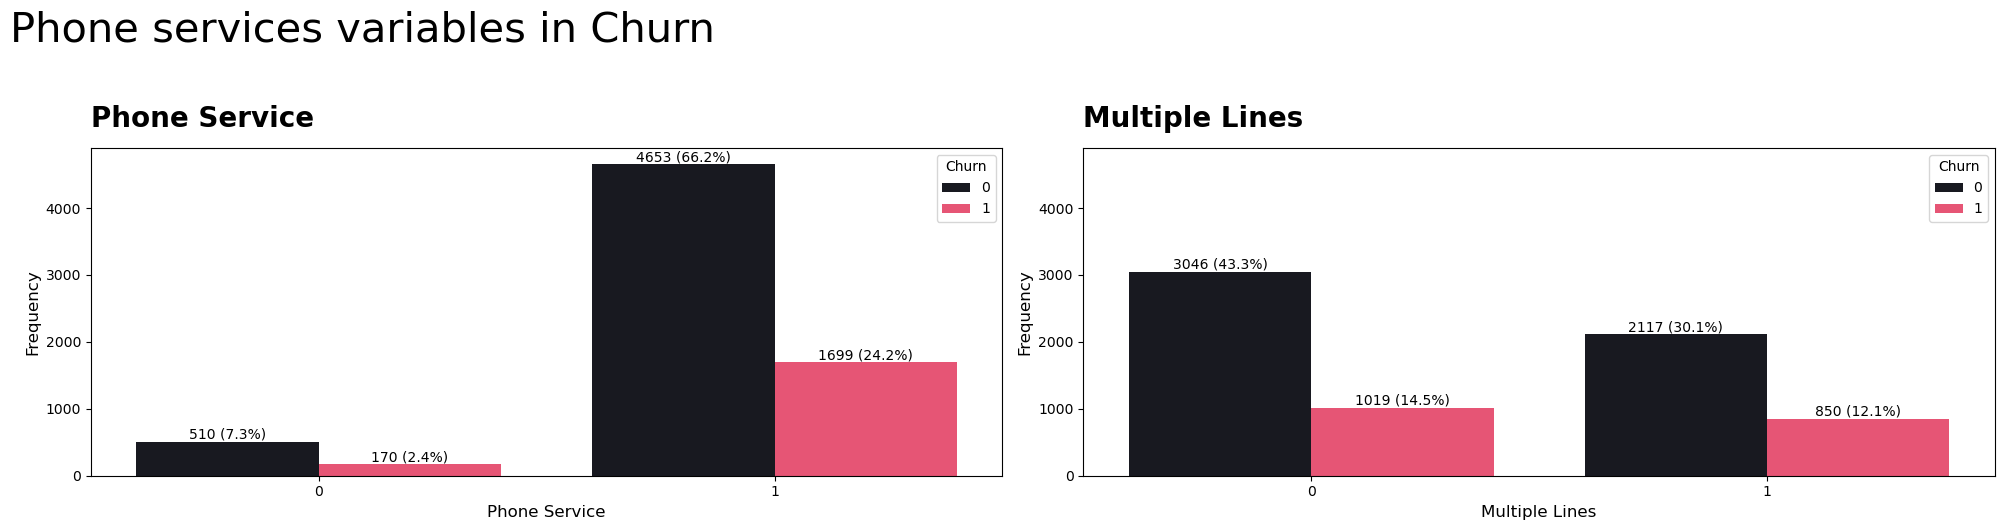

In [26]:
phone_columns = [('phone_PhoneService', 'Phone Service'), ('phone_MultipleLines', 'Multiple Lines')]

plt.figure(figsize=(20,5))
plt.suptitle('Phone services variables in Churn', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

distribution_plot('Churn', phone_columns, df) # Function to plot countplot with the target varible as hue

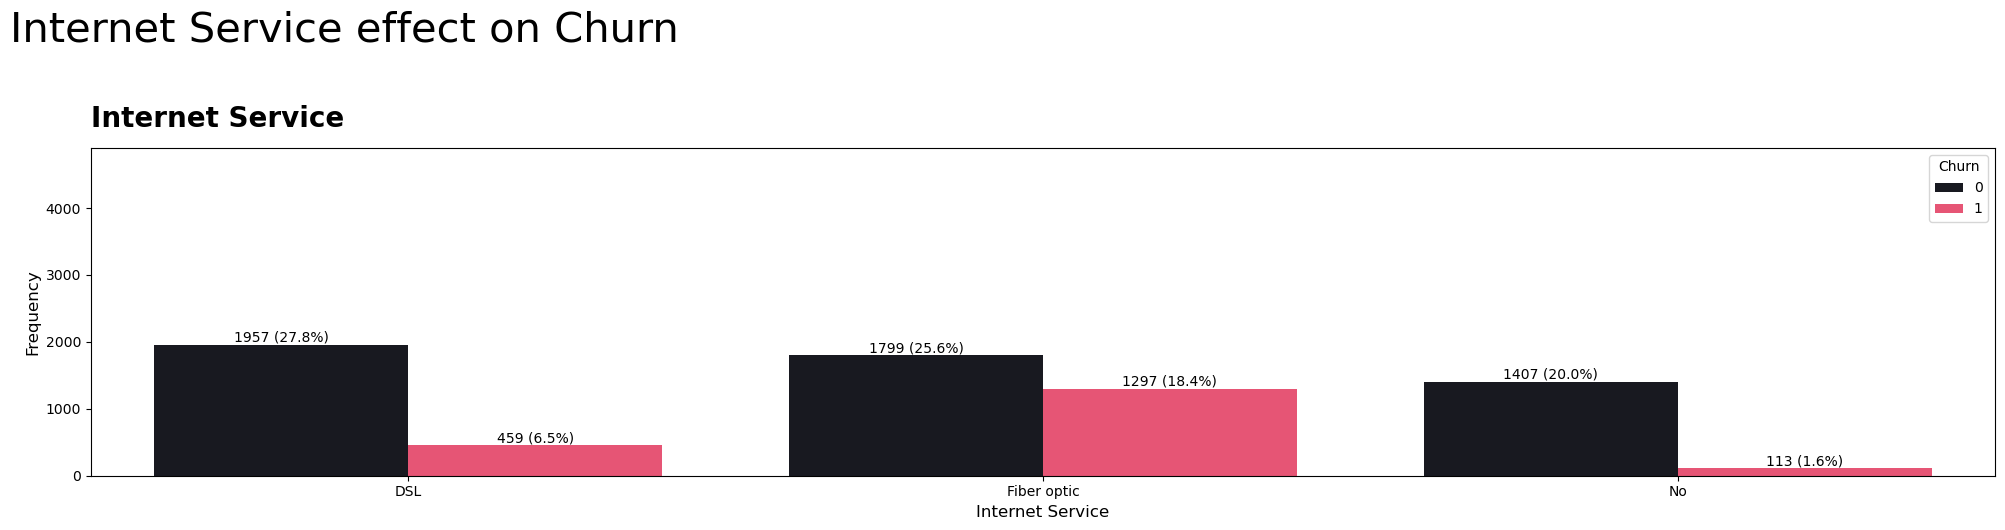

In [27]:
internet_columns = [('internet_InternetService', 'Internet Service')]

plt.figure(figsize=(20,5))
plt.suptitle('Internet Service effect on Churn', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

distribution_plot('Churn', internet_columns, df) # Function to plot countplot with the target varible as hue

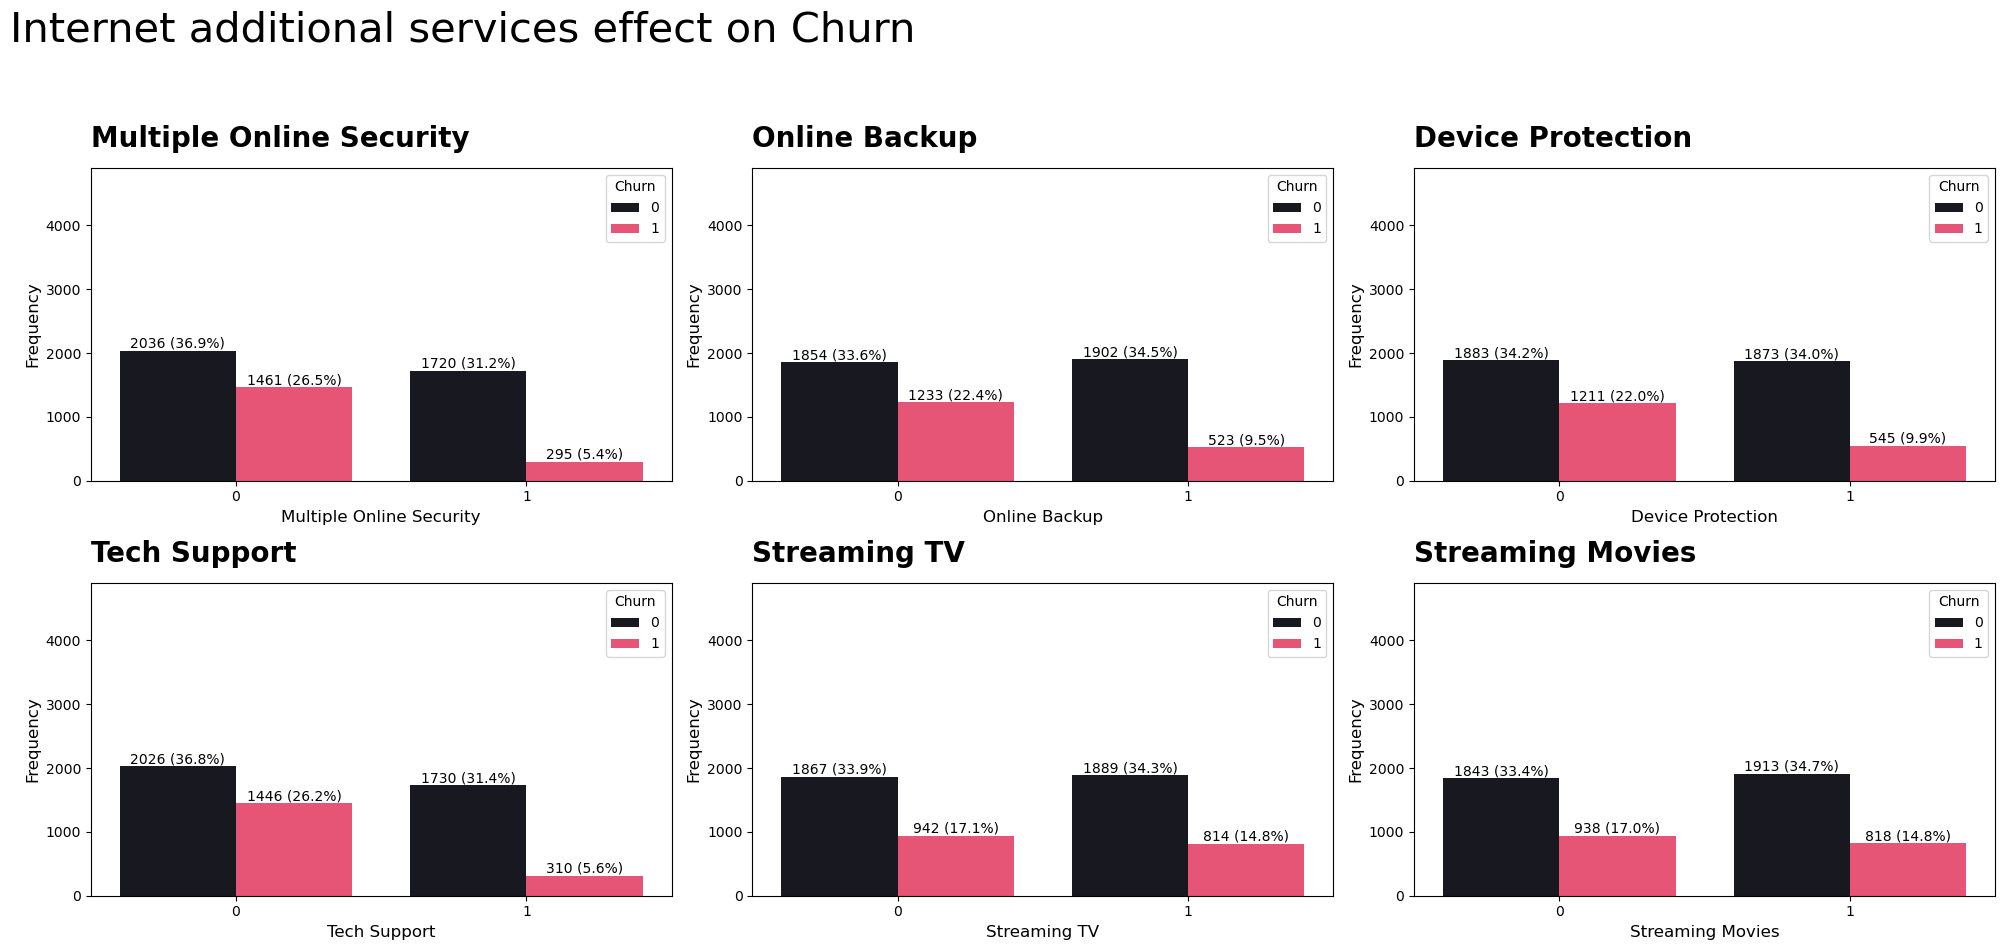

In [28]:
internet_columns = [('internet_OnlineSecurity', 'Multiple Online Security'), ('internet_OnlineBackup', 'Online Backup'), ('internet_DeviceProtection', 'Device Protection'),
                ('internet_TechSupport', 'Tech Support'), ('internet_StreamingTV', 'Streaming TV'), ('internet_StreamingMovies', 'Streaming Movies')]

plt.figure(figsize=(20,9))
plt.suptitle('Internet additional services effect on Churn', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

distribution_plot('Churn', internet_columns, df[df['internet_InternetService'] != 'No']) # Function to plot countplot with the target varible as hue

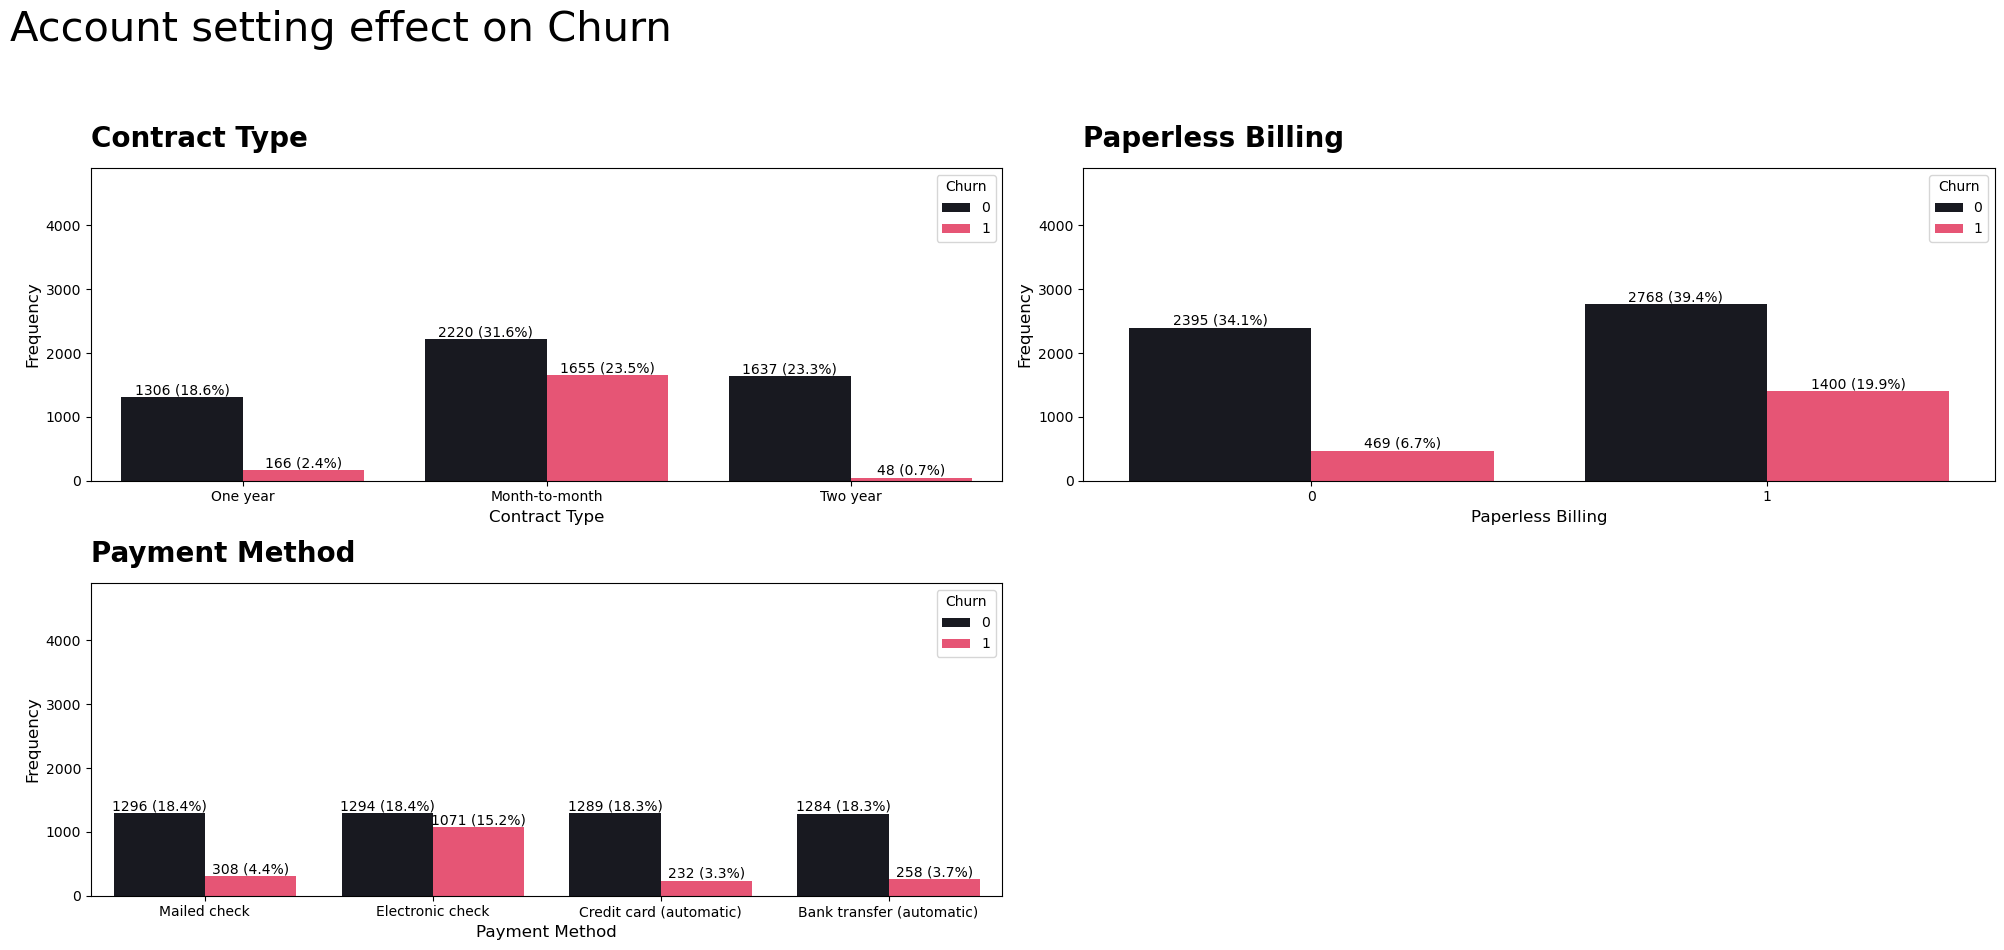

In [29]:
internet_columns = [('account_Contract', 'Contract Type'), ('account_PaperlessBilling', 'Paperless Billing'), ('account_PaymentMethod', 'Payment Method')]

plt.figure(figsize=(20,9))
plt.suptitle('Account setting effect on Churn', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

distribution_plot('Churn', internet_columns, df) # Function to plot countplot with the target varible as hue

> - Type of contract is extremeally related to the costumer Churn. As we can see, month-to-month clients are much more likely to leave the bank, when compared to one year and to year contract
> - Having papaerless biling seems to be related to a higher churn rate, a more depth analysis would be needed, in order to understand the reason behind this effect
> - Eletronic papyment check seems to be related to costumer Churn, a more depth analysis would be needed, in order to understand the reason behind this effect

#### Numeric Variables

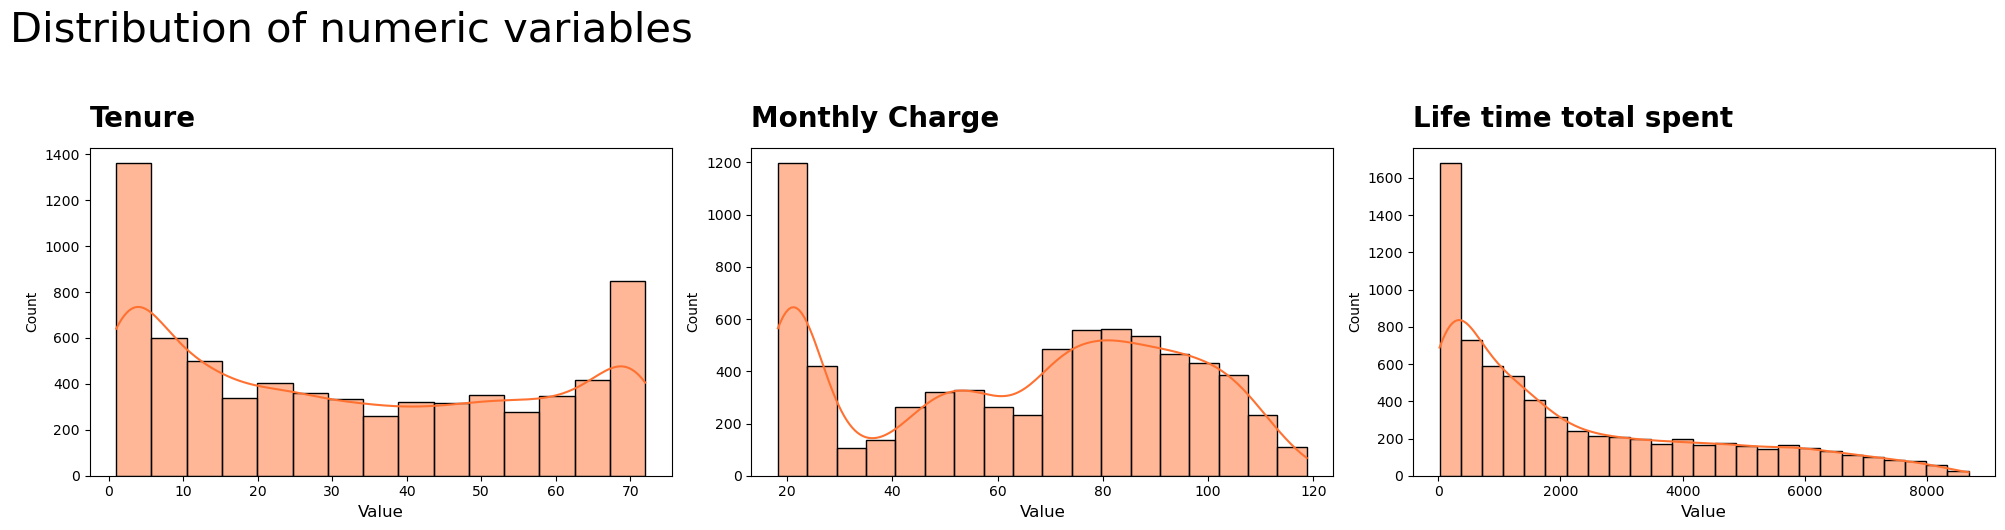

In [30]:
numeric_columns = [('customer_tenure', 'Tenure'), ('account_Charges_Monthly', 'Monthly Charge'), ('account_Charges_Total', 'Life time total spent')]

plt.figure(figsize=(20,5))
plt.suptitle('Distribution of numeric variables', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(numeric_columns):
    ax = plt.subplot(1, 3, n+1)
    ax = sns.histplot(x=col[0], data=df, color='#ff7131', kde=True)

    ax.set_title(f'{col[1]}', size=20, loc='left', fontweight='bold', pad=15)
    ax.set_xlabel('Value', size=12)

plt.tight_layout()
plt.show()

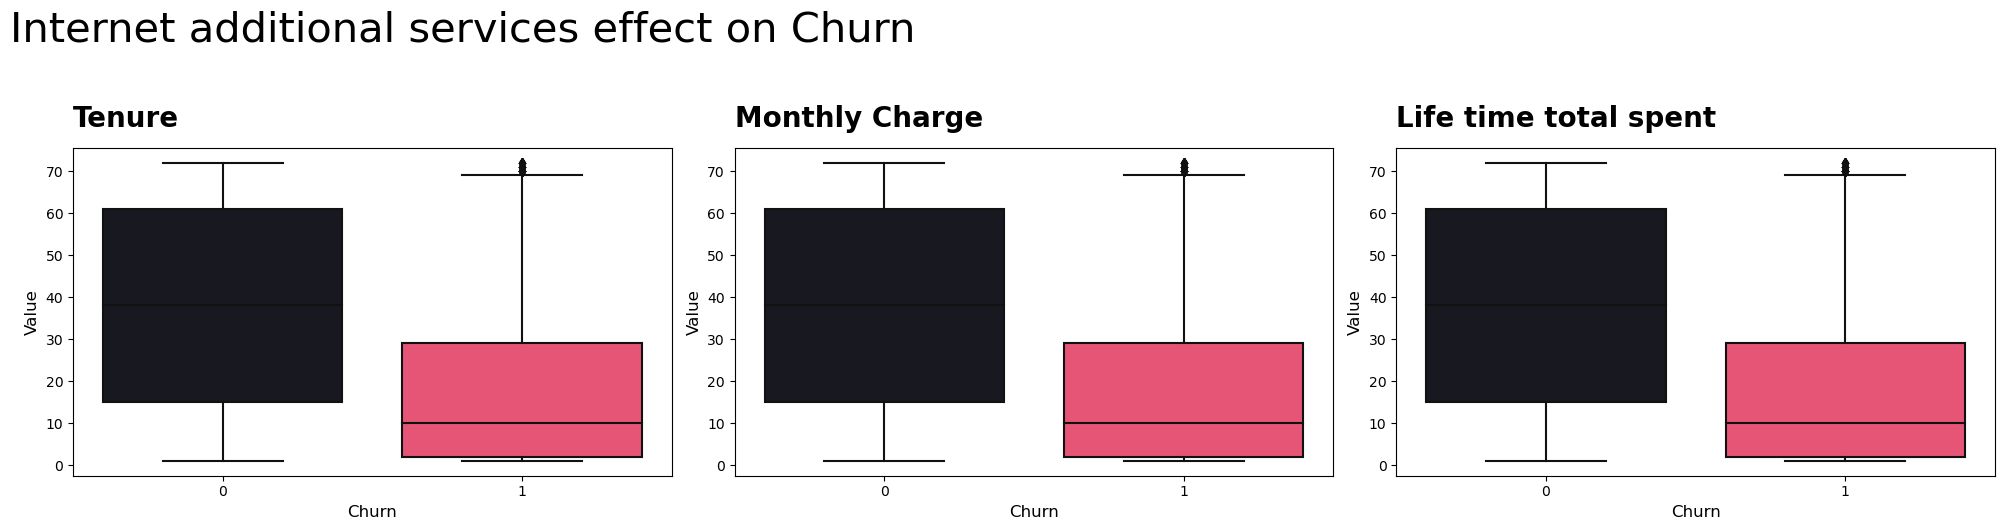

In [31]:
numeric_columns = [('customer_tenure', 'Tenure'), ('account_Charges_Monthly', 'Monthly Charge'), ('account_Charges_Total', 'Life time total spent')]

plt.figure(figsize=(20,5))
plt.suptitle('Internet additional services effect on Churn', size=30, x=0.0, y=1.05, horizontalalignment='left')
plt.subplots_adjust(hspace=0.5)

for n, col in enumerate(numeric_columns):
    ax = plt.subplot(1, 3, n+1)
    ax = sns.boxplot(y='customer_tenure', x='Churn', data=df, palette=binary_palette)

    ax.set_title(f'{col[1]}', size=20, loc='left', fontweight='bold', pad=15)
    ax.set_xlabel('Churn', size=12)
    ax.set_ylabel('Value', size=12)

plt.tight_layout()
plt.show()

> It seems that clients with longer contract durations, higher monthly charges or lifetime total expenditures are less likely to churn.

### Correlation

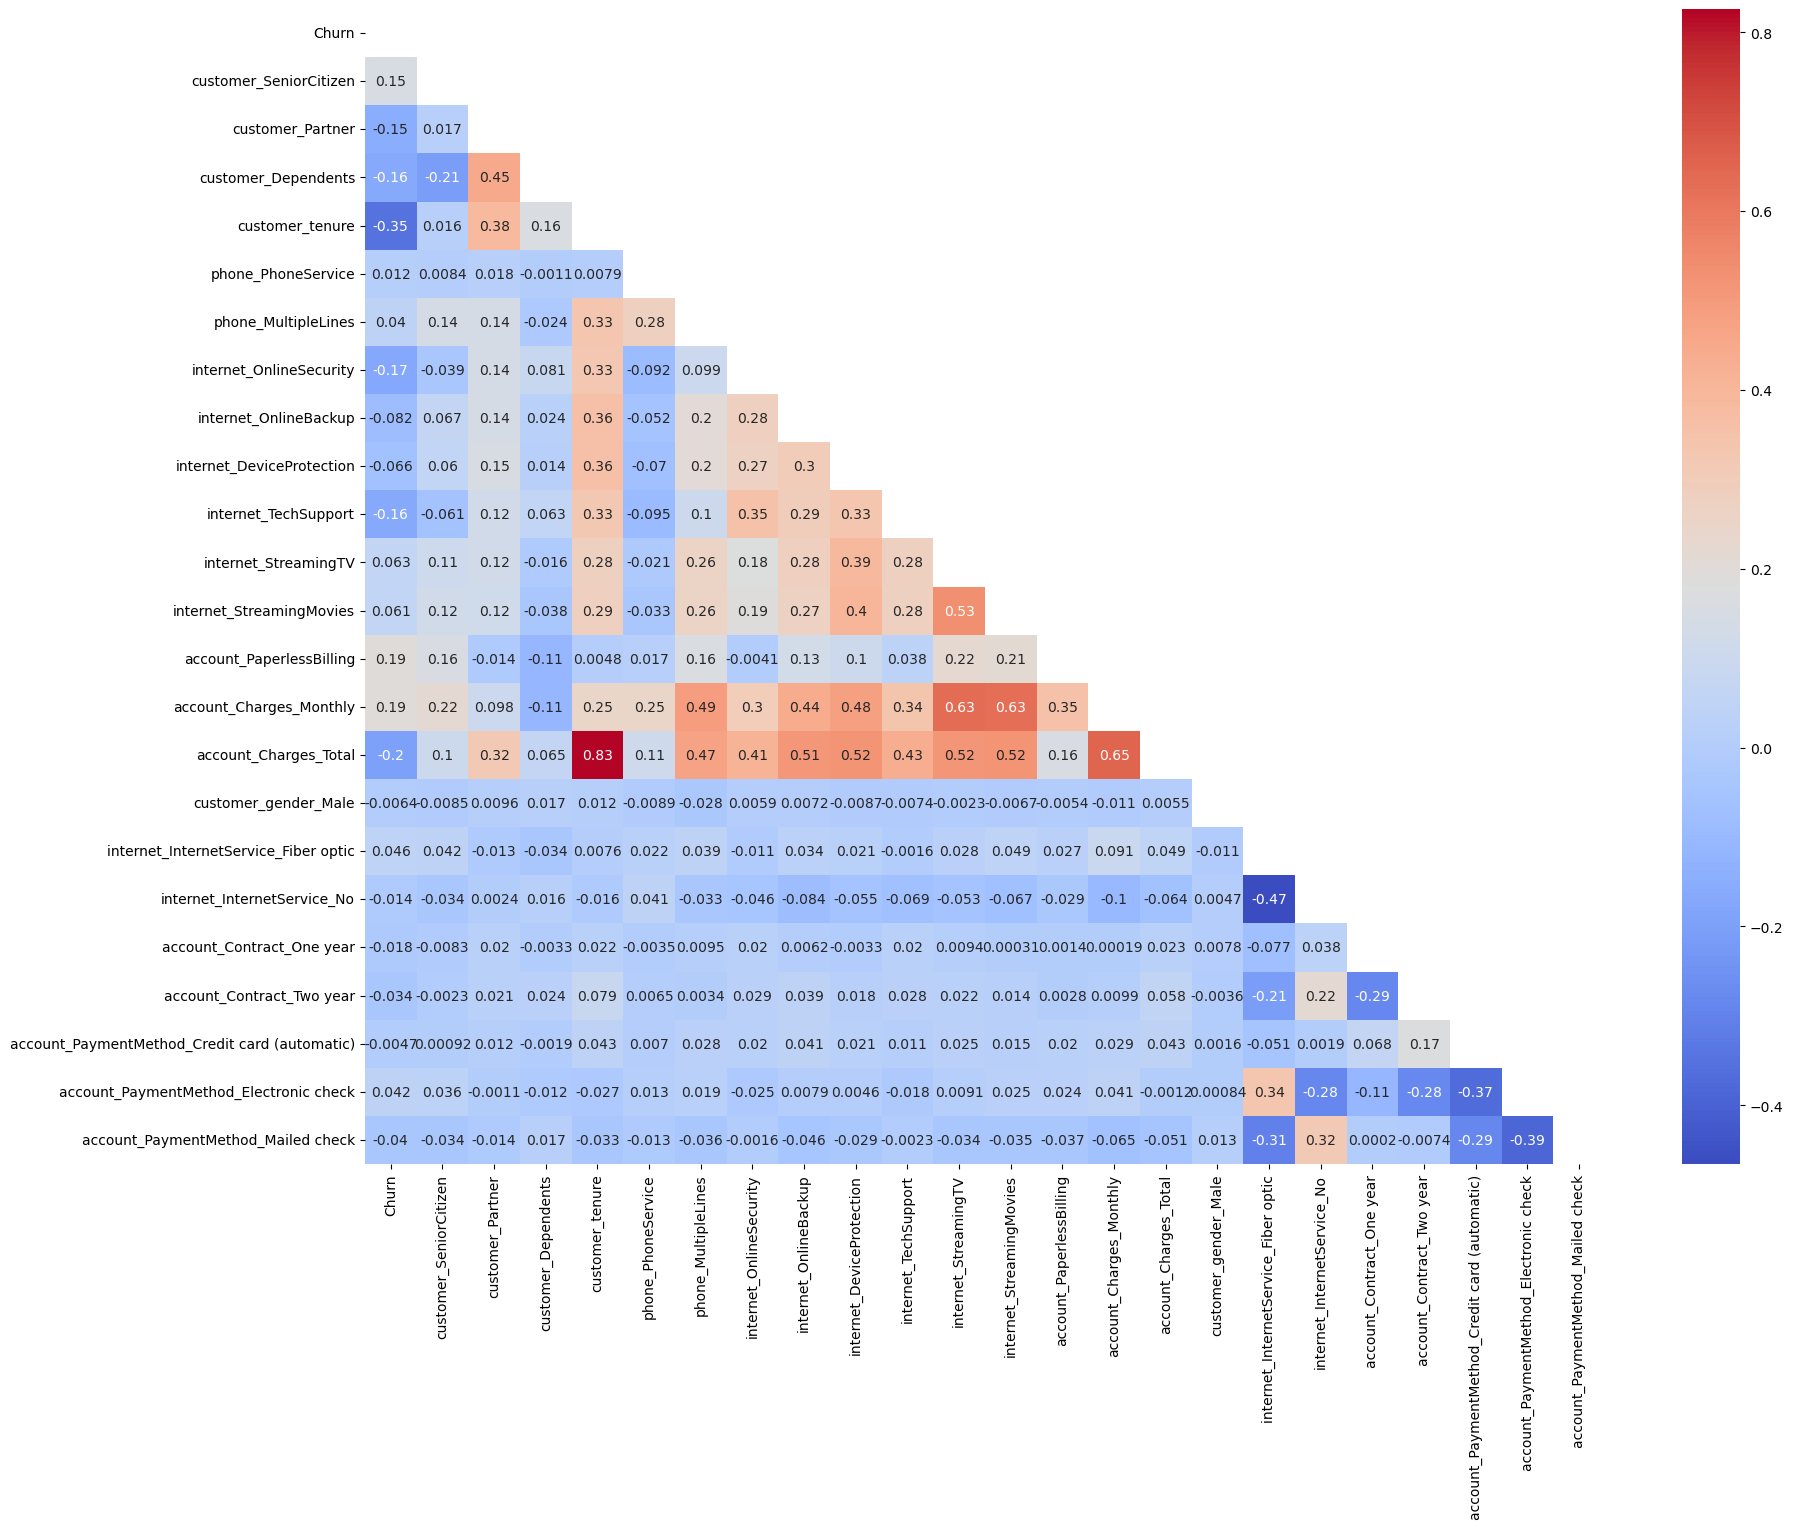

In [40]:
corr = df_encoded.corr()

# Create a mask for the upper triangle
mask_upper = np.triu(np.ones_like(corr, dtype=bool))

# Combine the masks
final_mask = mask_upper

plt.figure(figsize=(20,15))
sns.heatmap(data=corr, annot=True, mask=final_mask, cmap='coolwarm')

plt.show()


> It seems that the independent variables are not higly correlated. And in addition it seems that we might have to solve some multiocolinearity problems between independent features, such as, costumer_tenure and account_Charges_Total